# **Breast Cancer Image Classification Using CNN **

In [1]:
#Importing basic libraries
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow import keras
from keras import Sequential
import matplotlib.pyplot as plt
from PIL import Image
import os
import pathlib
import random

In [2]:
# install libraries
!pip install distutils


ERROR: Could not find a version that satisfies the requirement distutils (from versions: none)
ERROR: No matching distribution found for distutils

[notice] A new release of pip is available: 24.0 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [3]:
# install libraries
!pip install tensorflow


[notice] A new release of pip is available: 24.0 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [4]:
# insall seaborn
!pip install seaborn



[notice] A new release of pip is available: 24.0 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [5]:
# Defining the path
path = 'Breast-Cancer-Detection-Using-CNN-on-Ultrasound-Images-main\Dataset_Images'
data_dir = pathlib.Path(path)

<>:2: SyntaxWarning: invalid escape sequence '\D'
<>:2: SyntaxWarning: invalid escape sequence '\D'
C:\Users\tanya\AppData\Local\Temp\ipykernel_17360\1166156671.py:2: SyntaxWarning: invalid escape sequence '\D'
  path = 'Breast-Cancer-Detection-Using-CNN-on-Ultrasound-Images-main\Dataset_Images'


In [6]:
#Getting class names
class_names = np.array([item.name for item in data_dir.glob("*")])
class_names

array(['benign', 'malignant', 'normal'], dtype='<U9')

In [7]:
#Define paths and image count

benignPath = pathlib.Path(os.path.join(data_dir,'benign'))
normalPath = pathlib.Path(os.path.join(data_dir,'normal'))
malignantPath = pathlib.Path(os.path.join(data_dir,'malignant'))

In [8]:
#Image count

benignImageCount = len(list(benignPath.glob('*.png')))
malignantImageCount = len(list(malignantPath.glob('*.png')))
normalImageCount = len(list(normalPath.glob('*.png')))
totalImageCount = benignImageCount + malignantImageCount + normalImageCount

print("Total number of Images: ", totalImageCount)
print("No. of Benign (non-dangerous) Images: {}({})".format(benignImageCount, round(benignImageCount*100/totalImageCount, 2)))
print("No. of Malignant (dangerous) Images: {}({})".format(malignantImageCount, round(malignantImageCount*100/totalImageCount, 2)))
print("No. of Normal (No Traces) Images: {}({})".format(normalImageCount, round(normalImageCount*100/totalImageCount, 2)))

Total number of Images:  1587
No. of Benign (non-dangerous) Images: 900(56.71)
No. of Malignant (dangerous) Images: 421(26.53)
No. of Normal (No Traces) Images: 266(16.76)


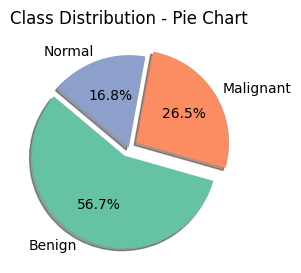

In [9]:
# Pie chart of class distribution
labels = ['Benign', 'Malignant', 'Normal']
sizes = [benignImageCount, malignantImageCount, normalImageCount]
colors = ['#66c2a5', '#fc8d62', '#8da0cb']
explode = (0.1, 0.1, 0)  # explode the first two slices slightly

plt.figure(figsize=(3,3))
plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%', shadow=True, startangle=140)
plt.title("Class Distribution - Pie Chart")
plt.show()


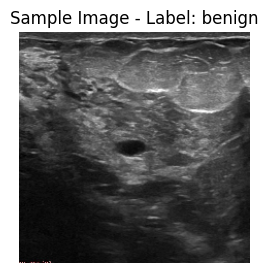

In [26]:
# Extract a sample image from the training dataset
for images, labels in train_data.take(1):  # Take one batch of images from the dataset
    sample_image = images[0].numpy()  # Extract the first image in the batch and convert to a NumPy array
    sample_label = labels[0].numpy()  # Extract the corresponding label
    break  # Break after extracting one batch

# Display the sample image
plt.figure(figsize=(4, 3))
plt.imshow(sample_image.astype("uint8"))  # Display the image (ensure it's in uint8 format for proper visualization)
plt.title(f"Sample Image - Label: {train_data.class_names[sample_label]}")
plt.axis("off")
plt.show()


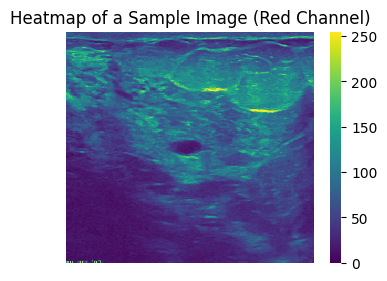

In [27]:
plt.figure(figsize=(4, 3))
sns.heatmap(sample_image[:, :, 0], cmap='viridis', cbar=True)  # Use the Red channel
plt.title("Heatmap of a Sample Image (Red Channel)")
plt.axis('off')
plt.show()


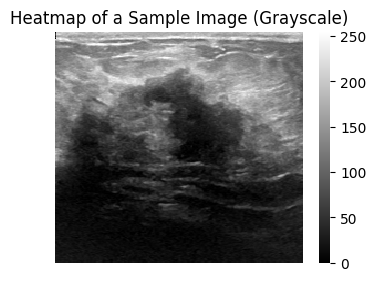

In [ ]:
plt.figure(figsize=(4, 3))

# Convert to grayscale by averaging the RGB channels
grayscale_image = sample_image.mean(axis=2)  # Average across the last dimension (RGB channels)

# Plot the grayscale heatmap
sns.heatmap(grayscale_image, cmap='gray', cbar=True)  # Use 'gray' colormap for grayscale
plt.title("Heatmap of a Sample Image (Grayscale)")
plt.axis('off')
plt.show()


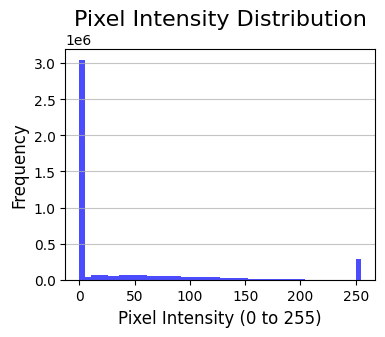

In [ ]:
image_batch, label_batch = next(iter(train_data))
sample_images = image_batch.numpy()

# Flatten the pixel intensities of all images to 1D for histogram
flattened_pixels = sample_images.flatten()

# Plotting the histogram
plt.figure(figsize=(4, 3))
plt.hist(flattened_pixels, bins=50, color='blue', alpha=0.7)
plt.title("Pixel Intensity Distribution", fontsize=16)
plt.xlabel("Pixel Intensity (0 to 255)", fontsize=12)
plt.ylabel("Frequency", fontsize=12)
plt.grid(axis='y', alpha=0.75)
plt.show()

In [12]:
# Build the CNN

batch_size = 32
img_height = 224
img_width = 224

In [13]:
#Separating data sets

from tensorflow.keras.utils import image_dataset_from_directory

train_data = image_dataset_from_directory(data_dir,validation_split=0.2,subset="training",seed=123,image_size=(img_height, img_width),batch_size=batch_size)

val_data = image_dataset_from_directory(data_dir,validation_split=0.2,subset="validation",seed=123,image_size=(img_height,img_width),batch_size=batch_size)

Found 1587 files belonging to 3 classes.
Using 1270 files for training.
Found 1587 files belonging to 3 classes.
Using 317 files for validation.


In [14]:
# Defining the Model

#We rescale images add a Dropout to avoid the overfitting as we have 4 class the last layer contain the number of class and we have softmax as activation,it will give us a pourcentage of each class and we'll choice the maximum pourcentage as the class

# 7 layer CNN Model Architecture with 3 Convolution layer each followed by max pooling layer
# Filter size =3X3 and Activation function = Relu
from tensorflow.keras import layers
model = tf.keras.Sequential([
  layers.Rescaling(1./255, input_shape=(img_height, img_width, 3)),

  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),

  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),

  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),

  layers.Dropout(0.5),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(3,activation="softmax")
])

c:\Users\tanya\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\preprocessing\tf_data_layer.py:19: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [15]:
#Compiling the Model

model.compile(optimizer="Adam",
            loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
            metrics=["accuracy"])

epochs = 2
history = model.fit(train_data,
                    epochs=epochs,
                    validation_data=val_data,
                    batch_size=batch_size)


Epoch 1/2


c:\Users\tanya\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\backend\tensorflow\nn.py:678: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Softmax activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


40/40 ━━━━━━━━━━━━━━━━━━━━ 17s 346ms/step - accuracy: 0.5159 - loss: 1.0658 - val_accuracy: 0.6688 - val_loss: 0.7630
Epoch 2/2
40/40 ━━━━━━━━━━━━━━━━━━━━ 11s 268ms/step - accuracy: 0.7074 - loss: 0.6603 - val_accuracy: 0.6940 - val_loss: 0.7426


In [16]:
#Keys

history.history.keys()

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])

In [17]:
#Evaluating - İt return the lost and accuracy

model.evaluate(val_data)

10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 76ms/step - accuracy: 0.6999 - loss: 0.7393


[0.7425798177719116, 0.6940063238143921]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 167ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 84ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 74ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 81ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 102ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 93ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 79ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 113ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 81ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step


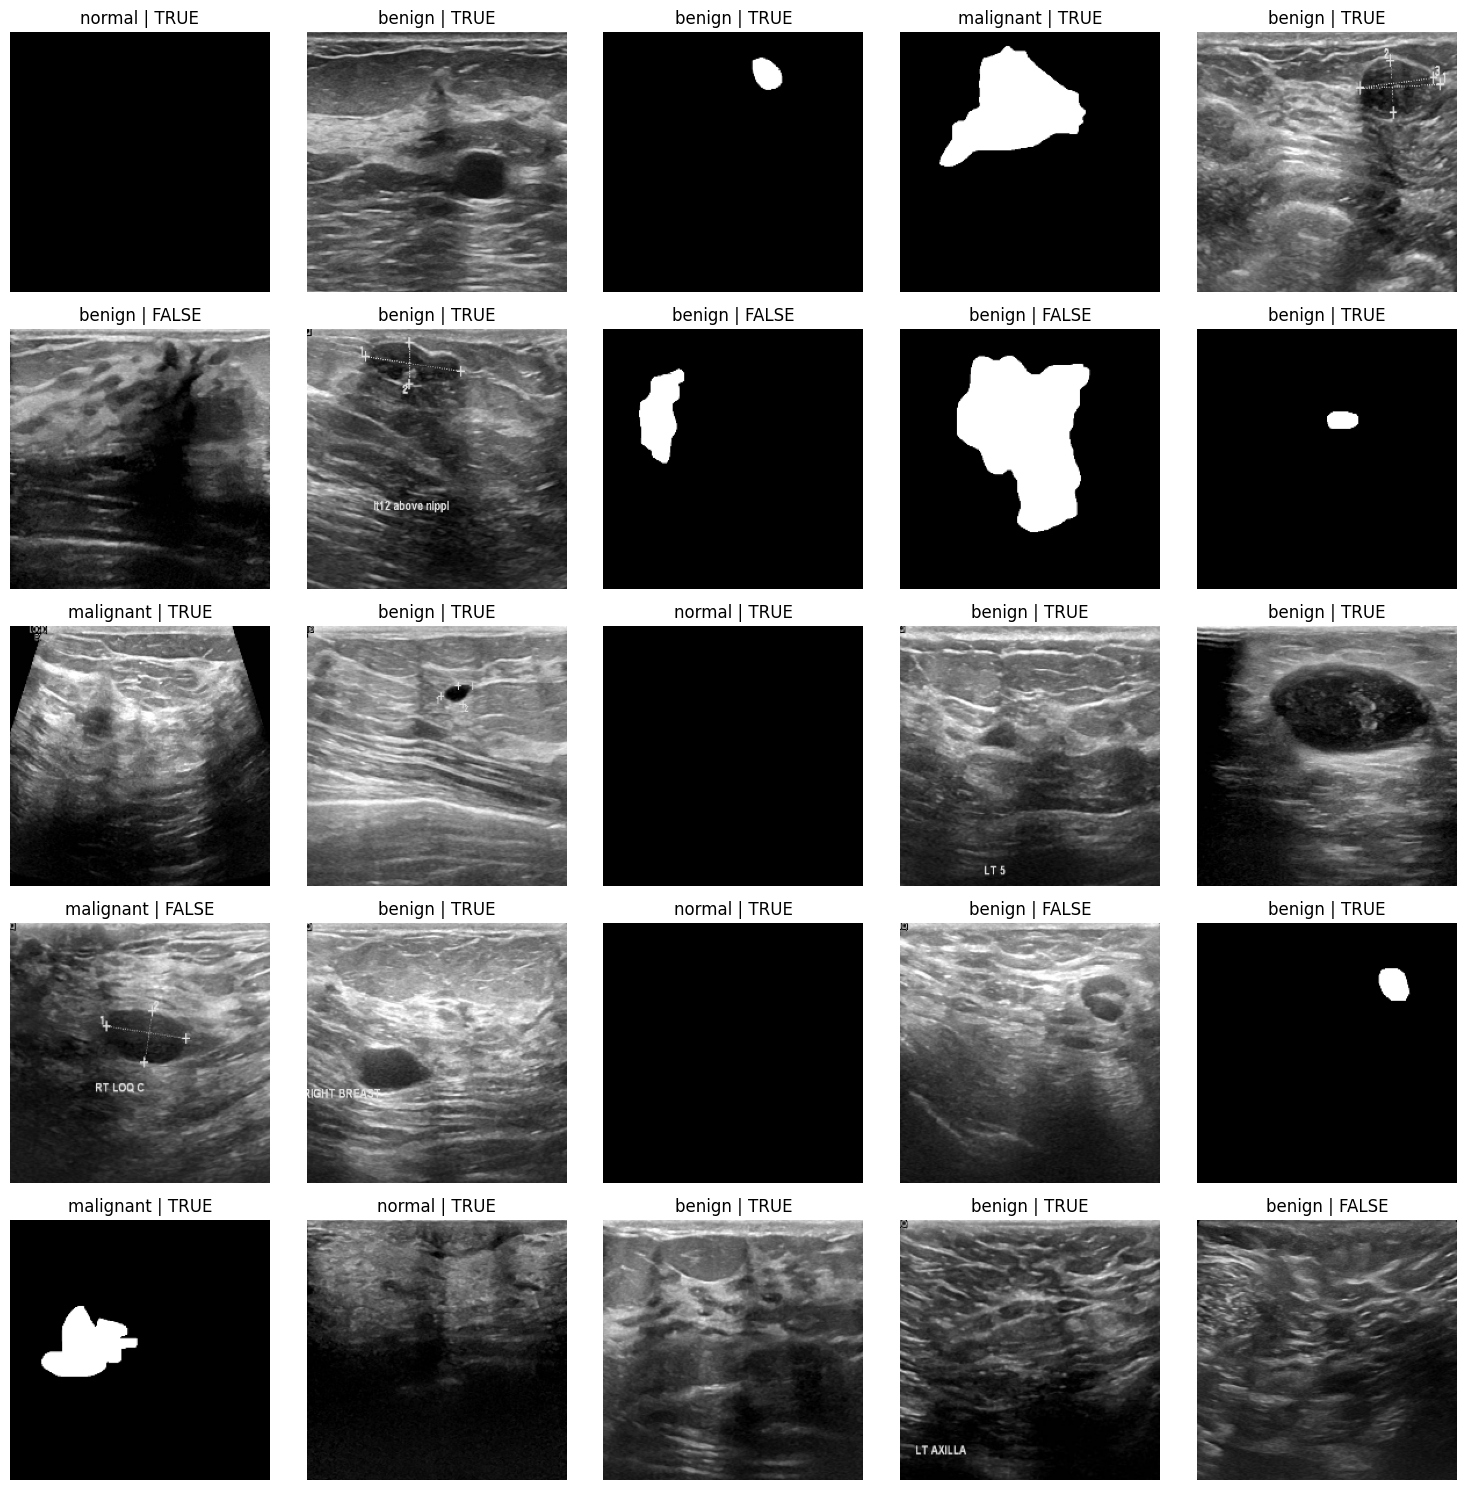

In [18]:
# Assuming val_data is the validation dataset, and model is the trained model
plt.figure(figsize=(15, 15))
class_names = val_data.class_names

# Iterate over a batch of validation images
for images, labels in val_data.take(1):
    # Get the number of images in the batch
    num_images = images.shape[0]
    
    # Limiting to 25 images
    for i in range(min(num_images, 25)): 
        ax = plt.subplot(5, 5, i + 1)
        
        # Get image and label
        img = images[i].numpy().astype("uint8")
        true_label = class_names[labels[i].numpy()]
        
        # Prepare image for prediction (expand dimensions to fit model input shape)
        img_expanded = tf.expand_dims(images[i], axis=0)  # Expanding to include batch dimension
        
        # Make prediction
        predictions = model.predict(img_expanded)
        predicted_class = np.argmax(predictions)
        
        # Compare prediction with true label
        result = " | TRUE" if class_names[predicted_class] == true_label else " | FALSE"
        
        # Plot image
        plt.imshow(img)
        plt.title(f"{class_names[predicted_class]}{result}")
        plt.axis("off")

plt.tight_layout()
plt.show()


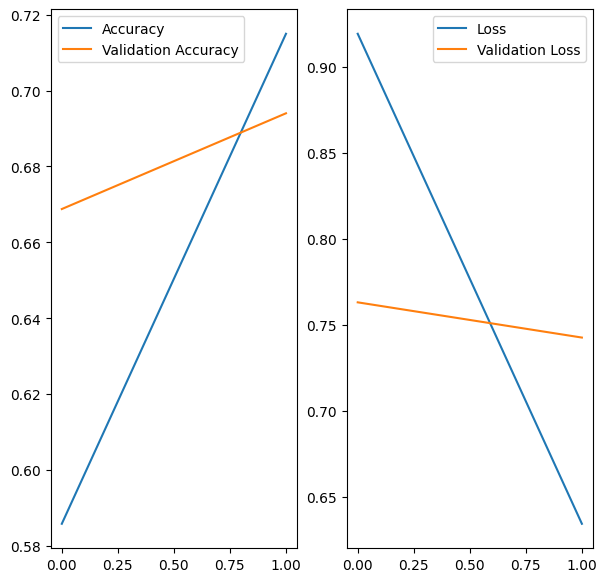

In [19]:
# Accuracy vs Lost

acc = history.history['accuracy']
val_acc =  history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(7,7))
plt.subplot(1,2,1)
plt.plot(epochs_range,acc,label='Accuracy')
plt.plot(epochs_range,val_acc,label="Validation Accuracy")
plt.legend()

plt.subplot(1,2,2)
plt.plot(epochs_range,loss,label='Loss')
plt.plot(epochs_range,val_loss,label="Validation Loss")
plt.legend()
plt.show()


In [20]:
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc
import seaborn as sns

# Assuming `y_true` is the true labels and `y_pred` is the predicted labels from the model
# Generate true labels and predicted probabilities
y_true = []
y_pred = []
y_prob = []

for images, labels in val_data:
    predictions = model.predict(images)
    y_true.extend(labels.numpy())
    y_pred.extend(np.argmax(predictions, axis=1))
    y_prob.extend(predictions)

# Classification Report
report = classification_report(y_true, y_pred, target_names=class_names, output_dict=True)
print("Classification Report:")
print(classification_report(y_true, y_pred, target_names=class_names))

# ROC-AUC
fpr = {}
tpr = {}
roc_auc = {}
for i in range(len(class_names)):
    fpr[i], tpr[i], _ = roc_curve(np.array(y_true) == i, [prob[i] for prob in y_prob])
    roc_auc[i] = auc(fpr[i], tpr[i])


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 358ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 171ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 124ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 139ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 149ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 154ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 139ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 162ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 143ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 237ms/step
Classification Report:
              precision    recall  f1-score   support

      benign       0.67      0.92      0.78       182
   malignant       0.61      0.28      0.38        79
      normal       0.97      0.54      0.69        56

    accuracy                           0.69       317
   macro avg       0.75      0.58      0.62       317
weighted avg       0.71      0.69      0.66       317



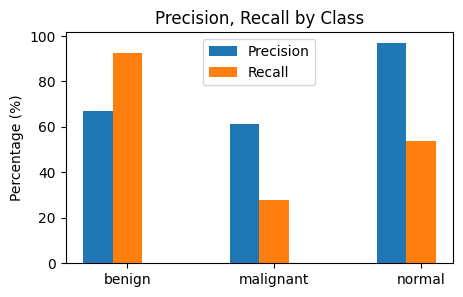

In [21]:
import matplotlib.pyplot as plt

# Extract metrics
metrics = ['Precision', 'Recall',]
values = [
    [report[class_name][metric.lower()] * 100 for class_name in class_names] 
    for metric in metrics
]

plt.figure(figsize=(5,3))
for i, metric in enumerate(metrics):
    plt.bar(np.arange(len(class_names)) + i * 0.2, values[i], width=0.2, label=metric)

plt.xticks(np.arange(len(class_names)) + 0.2, class_names)
plt.ylabel("Percentage (%)")
plt.title("Precision, Recall by Class")
plt.legend()
plt.show()

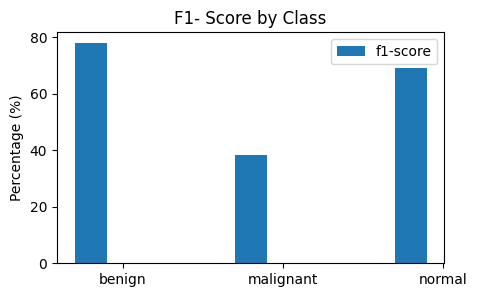

In [22]:
import matplotlib.pyplot as plt

# Extract metrics
metrics = ['f1-score']
values = [
    [report[class_name][metric.lower()] * 100 for class_name in class_names] 
    for metric in metrics
]

plt.figure(figsize=(5,3))
for i, metric in enumerate(metrics):
    plt.bar(np.arange(len(class_names)) + i * 0.2, values[i], width=0.2, label=metric)

plt.xticks(np.arange(len(class_names)) + 0.2, class_names)
plt.ylabel("Percentage (%)")
plt.title("F1- Score by Class")
plt.legend()
plt.show()

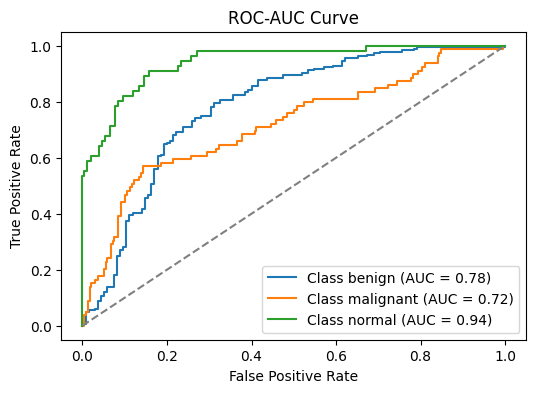

In [23]:
plt.figure(figsize=(6,4))

for i in range(len(class_names)):
    plt.plot(fpr[i], tpr[i], label=f"Class {class_names[i]} (AUC = {roc_auc[i]:.2f})")

plt.plot([0, 1], [0, 1], color="gray", linestyle="--")
plt.title("ROC-AUC Curve")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend()
plt.show()


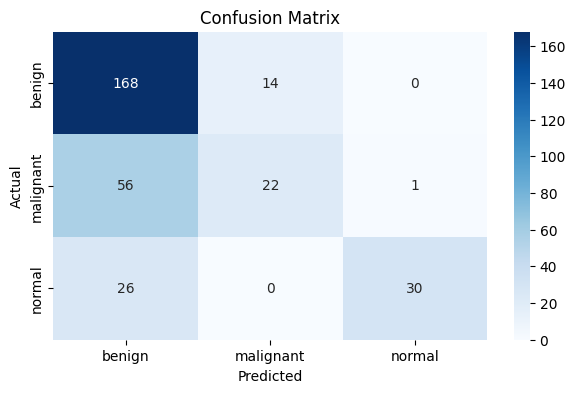

In [24]:
# Confusion Matrix
cm = confusion_matrix(y_true, y_pred)

plt.figure(figsize=(7, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=class_names, yticklabels=class_names)
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()
